In [2]:
import PIL
import PIL.Image as Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# MPII에서 각 파트 번호, 선으로 연결될 POSE_PAIRS
BODY_PARTS = { "Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
                "Background": 15 }

POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
                ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
                ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
                ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]

In [4]:
protoFile = 'caffemodels/pose_deploy_linevec_faster_4_stages.prototxt'
weightsFile = 'caffemodels/pose_iter_160000.caffemodel'

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [10]:
image = cv2.imread('Sample_Pic_OD/HJ.jpg', cv2.IMREAD_COLOR)

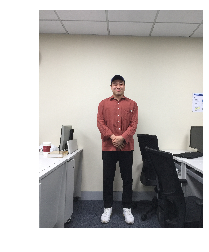

In [11]:
b, g, r = cv2.split(image)   # img파일을 b,g,r로 분리
image2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
plt.axis('off')
plt.imshow(image2)

In [12]:
imageHeight, imageWidth, _ = image.shape

In [14]:
# network 넣기 전에 전처리
inpBlob = cv2.dnn.blobFromImage(image, 1.0/255, (imageWidth, imageHeight), \
                               (0,0,0), swapRB=False, crop=False)

In [15]:
# network에 넣어주기
net.setInput(inpBlob)

In [16]:
output = net.forward()

In [22]:
# output.shape[0] = image ID / [1] = height of map / [2] = width
H = output.shape[2]
W = output.shape[3]
print("이미지 ID : {}, H : {}, W : {}".format(len(output[0]), output.shape[2],\
                                              output.shape[3]))

이미지 ID : 44, H : 408, W : 306


In [20]:
output.shape

(1, 44, 408, 306)

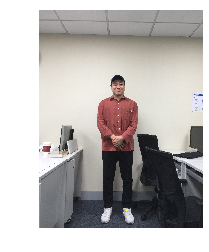

In [23]:
# keypoint 검출 시 이미지에 그려줌
points = []
for i in range(0,15):
    # 해당 신체부위 신뢰도 얻음
    probMap = output[0,i,:,:]
    
    # global 최댓값 찾기
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # 원래 이미지에 맞게 점 위치 변경
    x = (imageWidth * point[0]) / W
    y = (imageHeight * point[1]) / H
    
    # 키포인트 검출한 결과가 0.1보다 크면(검출한곳이 위 BODY_PARTS랑 맞는 부위면)
    # points에 추가, 검출했는데 부위가 없으면 None으로
    if prob > 0.1:
        cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, \
                  lineType = cv2.FILLED)
        cv2.putText(image, "".format(i), (int(x), int(y)), \
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
        points.append((int(x), int(y)))
    else:
        points.append(None)

b, g, r = cv2.split(image)   # img파일을 b,g,r로 분리
image2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
plt.axis('off')
plt.imshow(image2)

In [24]:
imageCopy = image

# 각 POSE_PAIRS별로 선 그어줌 (머리 - 목, 목 - 왼쪽어깨, ...)
for pair in POSE_PAIRS:
    partA = pair[0]             # Head
    partA = BODY_PARTS[partA]   # 0
    partB = pair[1]             # Neck
    partB = BODY_PARTS[partB]   # 1
    
    #print(partA," 와 ", partB, " 연결\n")
    if points[partA] and points[partB]:
        cv2.line(imageCopy, points[partA], points[partB], (0, 255, 0), 2)


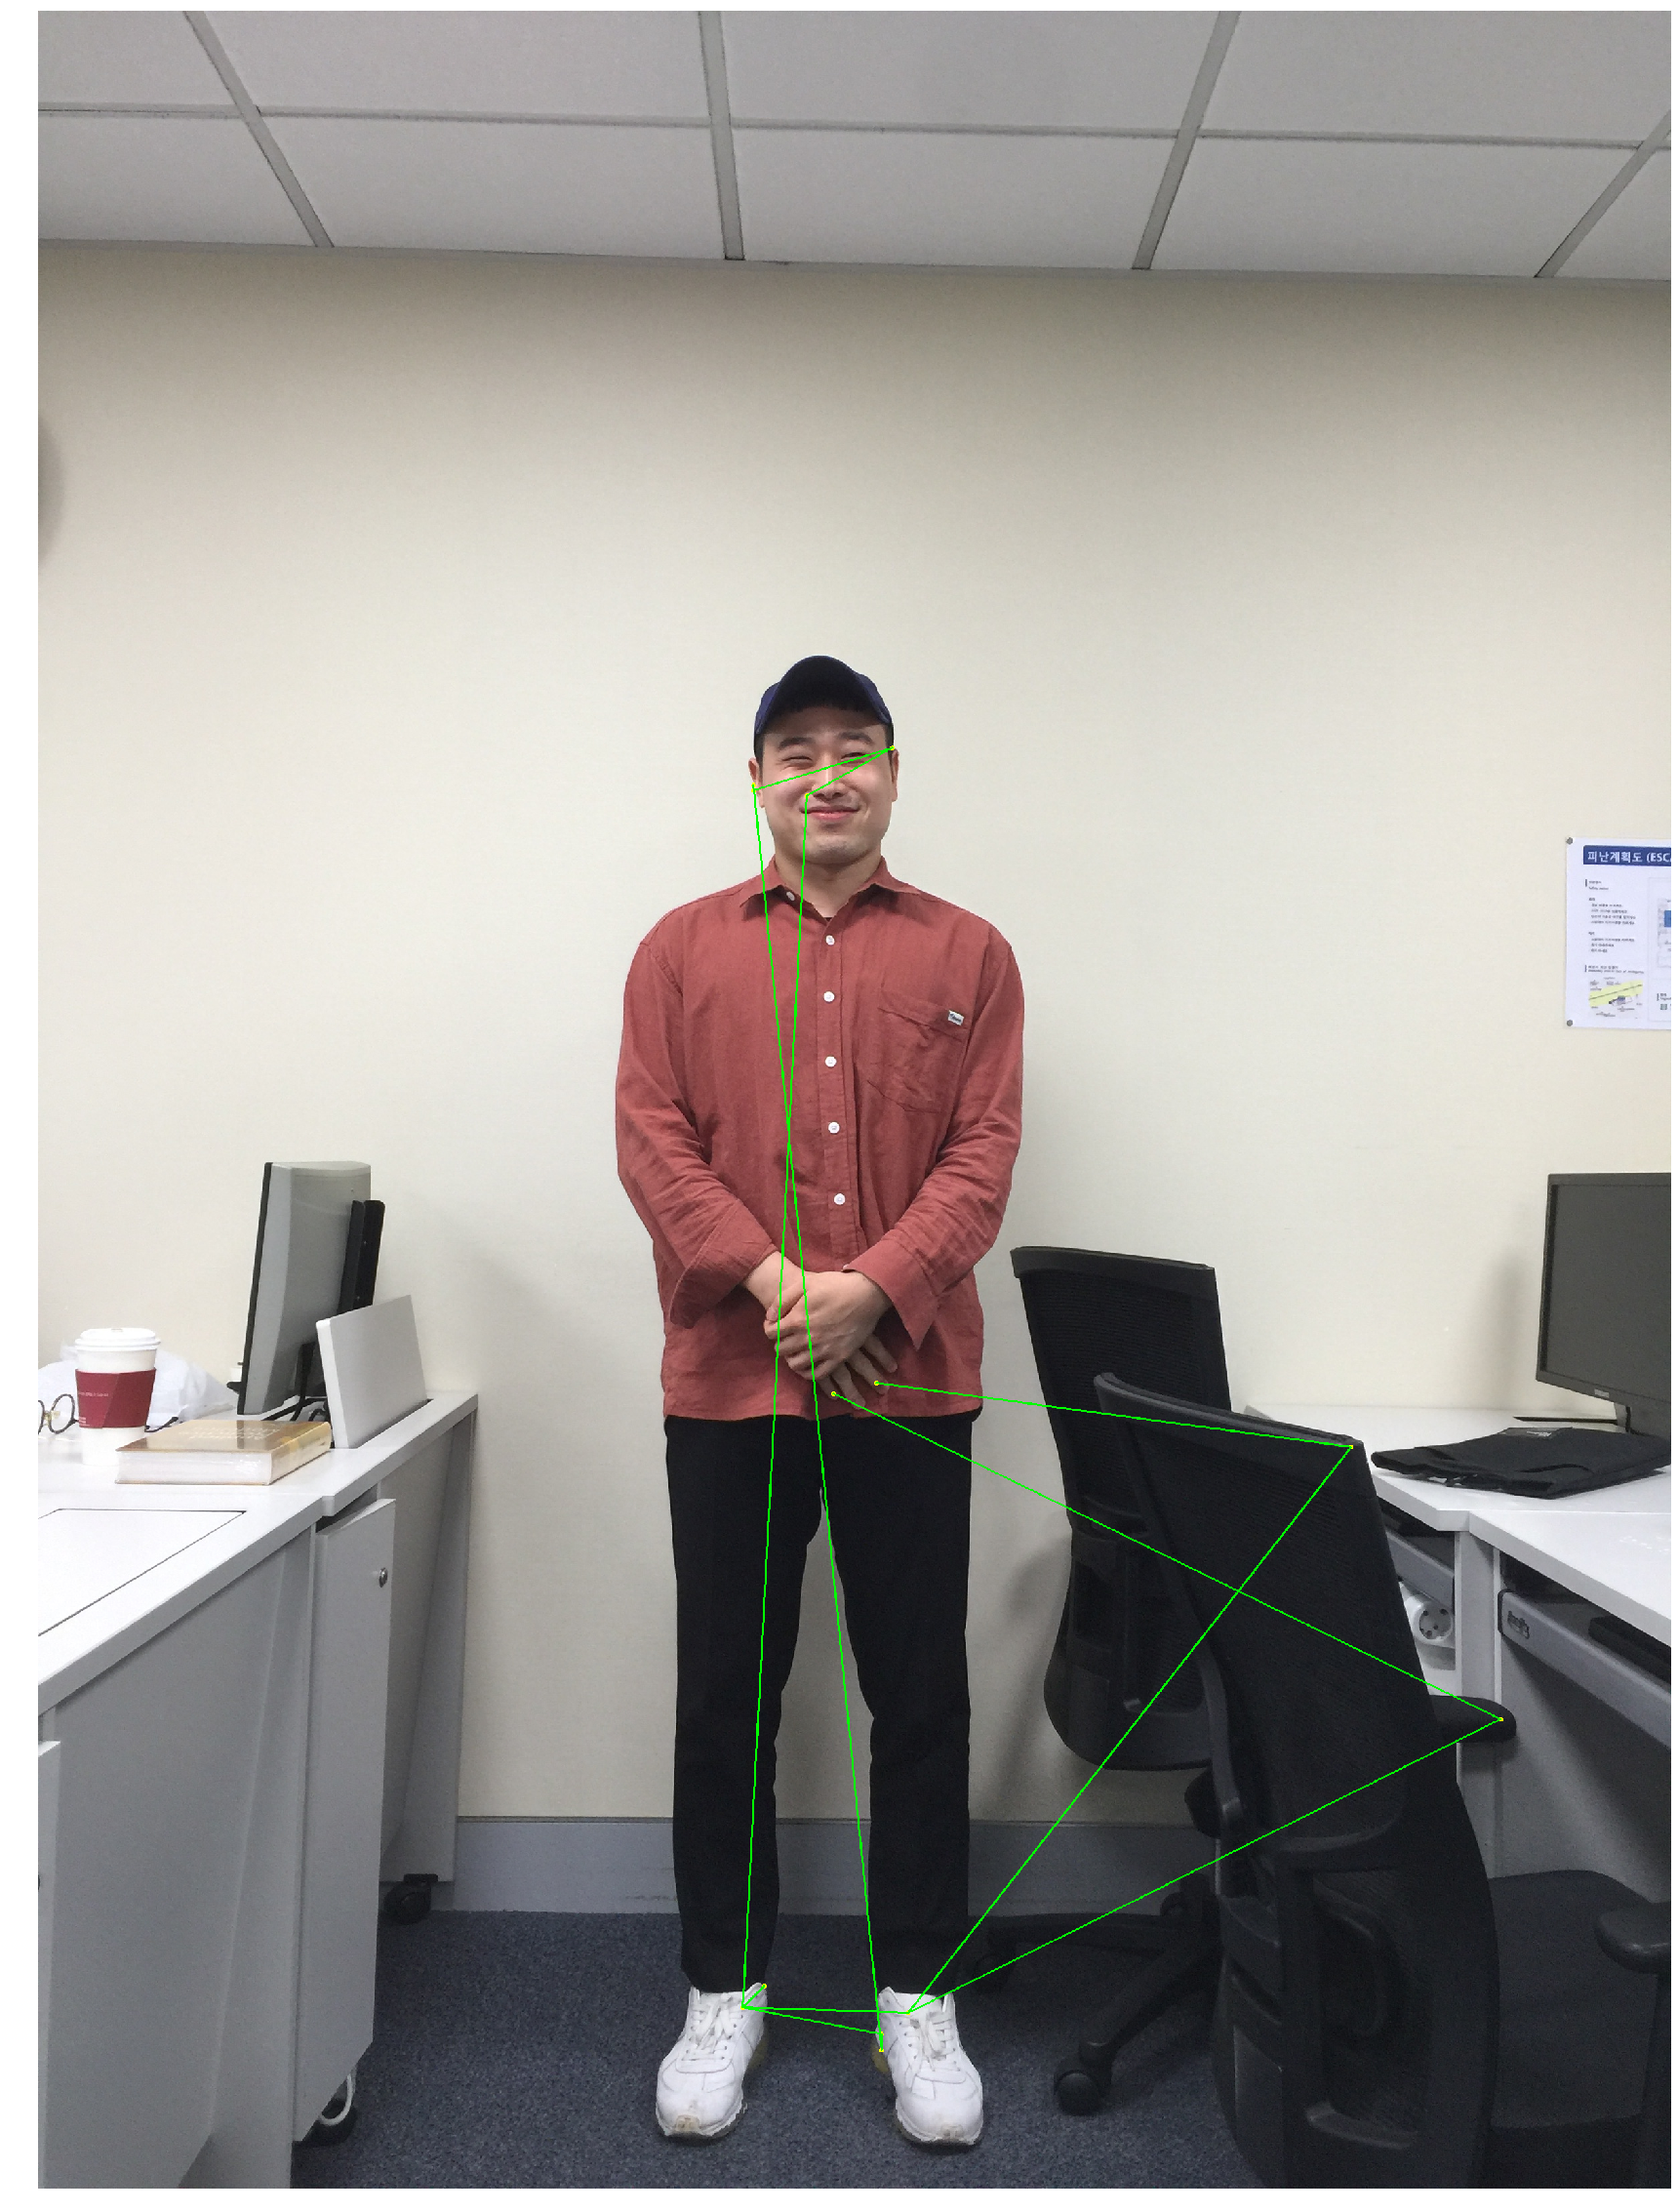

In [26]:
b, g, r = cv2.split(imageCopy)   # img파일을 b,g,r로 분리
image2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
plt.figure(figsize=(30,45))
plt.axis('off')
plt.imshow(image2)

# Steve Jobs

이미지 ID : 44, H : 82, W : 62


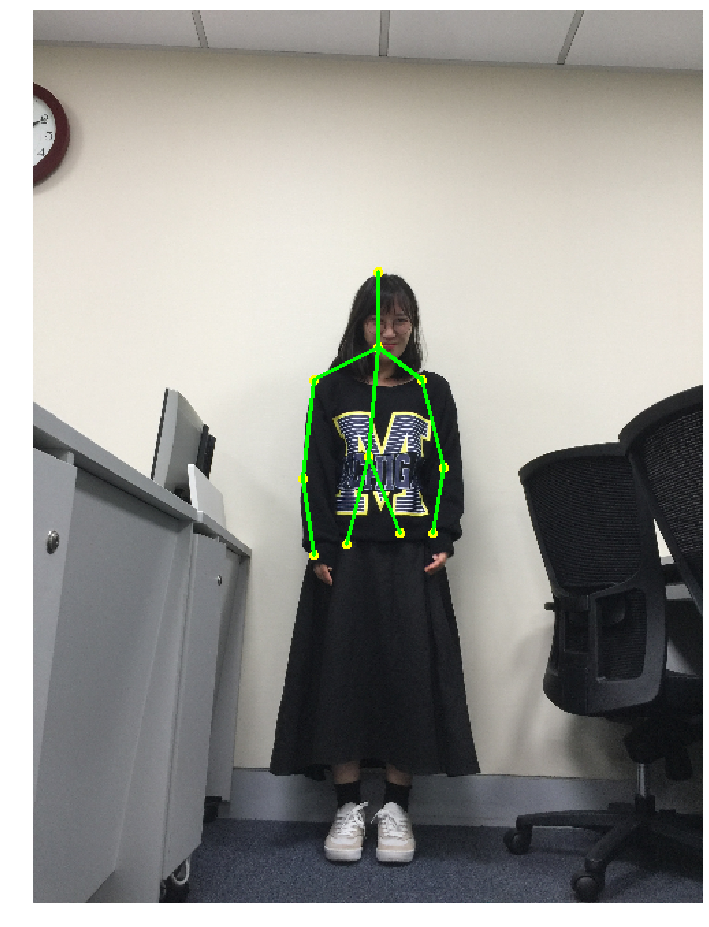

In [34]:
image = cv2.imread('Sample_Pic_OD/YJ.jpg', cv2.IMREAD_COLOR)
image = cv2.resize(image, dsize=(0, 0), fx=0.2, fy=0.2, interpolation=cv2.INTER_LINEAR)
imageHeight, imageWidth, _ = image.shape
# network 넣기 전에 전처리
inpBlob = cv2.dnn.blobFromImage(image, 1.0/255, (imageWidth, imageHeight), \
                               (0,0,0), swapRB=False, crop=False)
net.setInput(inpBlob)
output = net.forward()
# output.shape[0] = image ID / [1] = height of map / [2] = width
H = output.shape[2]
W = output.shape[3]
print("이미지 ID : {}, H : {}, W : {}".format(len(output[0]), output.shape[2],\
                                              output.shape[3]))

# keypoint 검출 시 이미지에 그려줌
points = []
for i in range(0,15):
    # 해당 신체부위 신뢰도 얻음
    probMap = output[0,i,:,:]
    
    # global 최댓값 찾기
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # 원래 이미지에 맞게 점 위치 변경
    x = (imageWidth * point[0]) / W
    y = (imageHeight * point[1]) / H
    
    # 키포인트 검출한 결과가 0.1보다 크면(검출한곳이 위 BODY_PARTS랑 맞는 부위면)
    # points에 추가, 검출했는데 부위가 없으면 None으로
    if prob > 0.1:
        cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, \
                  lineType = cv2.FILLED)
        cv2.putText(image, "".format(i), (int(x), int(y)), \
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
        points.append((int(x), int(y)))
    else:
        points.append(None)
        
imageCopy = image

# 각 POSE_PAIRS별로 선 그어줌 (머리 - 목, 목 - 왼쪽어깨, ...)
for pair in POSE_PAIRS:
    partA = pair[0]             # Head
    partA = BODY_PARTS[partA]   # 0
    partB = pair[1]             # Neck
    partB = BODY_PARTS[partB]   # 1
    
    #print(partA," 와 ", partB, " 연결\n")
    if points[partA] and points[partB]:
        cv2.line(imageCopy, points[partA], points[partB], (0, 255, 0), 2)
        
b, g, r = cv2.split(imageCopy)   # img파일을 b,g,r로 분리
image2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
plt.figure(figsize=(12,18))
plt.axis('off')
plt.imshow(image2)

이미지 ID : 44, H : 73, W : 34


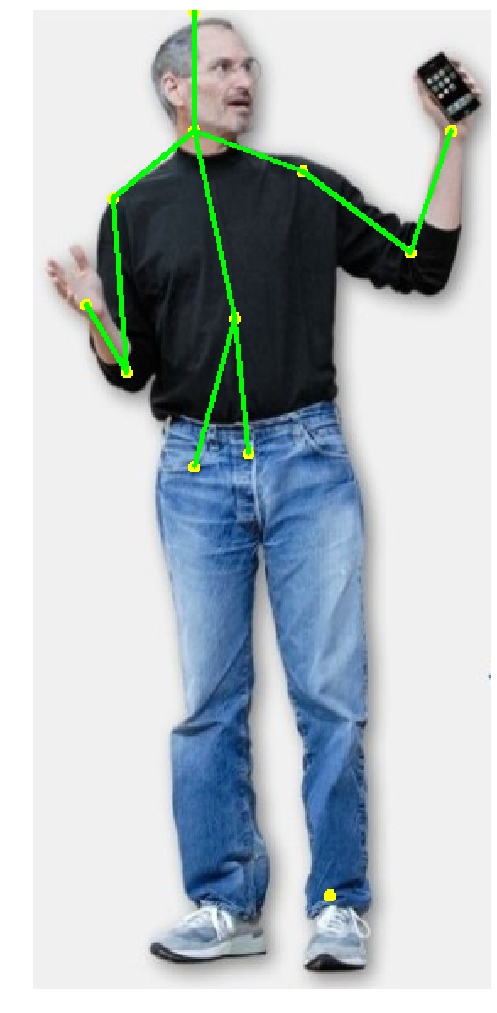

In [35]:
image = cv2.imread('Sample_Pic_OD/SJ.PNG', cv2.IMREAD_COLOR)
imageHeight, imageWidth, _ = image.shape
# network 넣기 전에 전처리
inpBlob = cv2.dnn.blobFromImage(image, 1.0/255, (imageWidth, imageHeight), \
                               (0,0,0), swapRB=False, crop=False)
net.setInput(inpBlob)
output = net.forward()
# output.shape[0] = image ID / [1] = height of map / [2] = width
H = output.shape[2]
W = output.shape[3]
print("이미지 ID : {}, H : {}, W : {}".format(len(output[0]), output.shape[2],\
                                              output.shape[3]))

# keypoint 검출 시 이미지에 그려줌
points = []
for i in range(0,15):
    # 해당 신체부위 신뢰도 얻음
    probMap = output[0,i,:,:]
    
    # global 최댓값 찾기
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # 원래 이미지에 맞게 점 위치 변경
    x = (imageWidth * point[0]) / W
    y = (imageHeight * point[1]) / H
    
    # 키포인트 검출한 결과가 0.1보다 크면(검출한곳이 위 BODY_PARTS랑 맞는 부위면)
    # points에 추가, 검출했는데 부위가 없으면 None으로
    if prob > 0.1:
        cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, \
                  lineType = cv2.FILLED)
        cv2.putText(image, "".format(i), (int(x), int(y)), \
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
        points.append((int(x), int(y)))
    else:
        points.append(None)
        
imageCopy = image

# 각 POSE_PAIRS별로 선 그어줌 (머리 - 목, 목 - 왼쪽어깨, ...)
for pair in POSE_PAIRS:
    partA = pair[0]             # Head
    partA = BODY_PARTS[partA]   # 0
    partB = pair[1]             # Neck
    partB = BODY_PARTS[partB]   # 1
    
    #print(partA," 와 ", partB, " 연결\n")
    if points[partA] and points[partB]:
        cv2.line(imageCopy, points[partA], points[partB], (0, 255, 0), 2)
        
b, g, r = cv2.split(imageCopy)   # img파일을 b,g,r로 분리
image2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
plt.figure(figsize=(12,18))
plt.axis('off')
plt.imshow(image2)

In [41]:
def makeSkeleton(image, ratio):
    # image = cv2.imread('')
    # ratio : reducing ratio for inferrence : 300-500 pixel size is good
    image = cv2.resize(image, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)
    imageHeight, imageWidth, _ = image.shape
    # network 넣기 전에 전처리
    inpBlob = cv2.dnn.blobFromImage(image, 1.0/255, (imageWidth, imageHeight), \
                                   (0,0,0), swapRB=False, crop=False)
    net.setInput(inpBlob)
    output = net.forward()
    # output.shape[0] = image ID / [1] = height of map / [2] = width
    H = output.shape[2]
    W = output.shape[3]
    print("이미지 ID : {}, H : {}, W : {}".format(len(output[0]), output.shape[2],\
                                                  output.shape[3]))

    # keypoint 검출 시 이미지에 그려줌
    points = []
    for i in range(0,15):
        # 해당 신체부위 신뢰도 얻음
        probMap = output[0,i,:,:]

        # global 최댓값 찾기
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

        # 원래 이미지에 맞게 점 위치 변경
        x = (imageWidth * point[0]) / W
        y = (imageHeight * point[1]) / H

        # 키포인트 검출한 결과가 0.1보다 크면(검출한곳이 위 BODY_PARTS랑 맞는 부위면)
        # points에 추가, 검출했는데 부위가 없으면 None으로
        if prob > 0.1:
            cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, \
                      lineType = cv2.FILLED)
            cv2.putText(image, "".format(i), (int(x), int(y)), \
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
            points.append((int(x), int(y)))
        else:
            points.append(None)

    imageCopy = image

    # 각 POSE_PAIRS별로 선 그어줌 (머리 - 목, 목 - 왼쪽어깨, ...)
    for pair in POSE_PAIRS:
        partA = pair[0]             # Head
        partA = BODY_PARTS[partA]   # 0
        partB = pair[1]             # Neck
        partB = BODY_PARTS[partB]   # 1

        #print(partA," 와 ", partB, " 연결\n")
        if points[partA] and points[partB]:
            cv2.line(imageCopy, points[partA], points[partB], (0, 255, 0), 2)

    b, g, r = cv2.split(imageCopy)   # img파일을 b,g,r로 분리
    image2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    plt.figure(figsize=(4,6))
    plt.axis('off')
    plt.imshow(image2)
    
    return image2

이미지 ID : 44, H : 41, W : 31


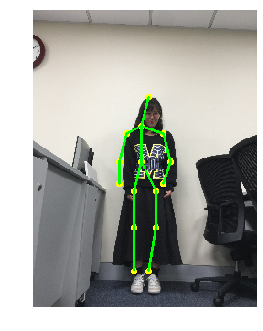

In [42]:
image = cv2.imread('Sample_Pic_OD/YJ.jpg', cv2.IMREAD_COLOR)
image2 = makeSkeleton(image,0.1)

In [44]:
image2.shape, image.shape

((326, 245, 3), (3264, 2448, 3))